# Exploratory Data Analysis of Anime Dataset

Exploratory Data Analysis is the Vital process of analyzing the initial data, summarizing the main characteristics and setting up the hypothesis often by means of visualization, 

<img width="800" height="500" src="https://pbs.twimg.com/media/DTYB9EXXkAAfthS.jpg" />

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
df1 = pd.read_csv("./rating.csv")
df2 = pd.read_csv("./anime.csv")

In [3]:
df1.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [4]:
df2.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


## Genre Analysis

In [5]:
originalGenre = []
indexCount = []

#function to collect each genre and number of genre per anime
def genreSplit(genre):
    if "," in str(genre):
        genrelist = genre.split(", ")
        indexCount.append(0)
        for i in genrelist:
            originalGenre.append(i)
            indexCount[-1]+=1
    else:
        indexCount.append(1)
        originalGenre.append(genre)   

df2['genre'].apply(genreSplit)[0]

#duplicating the anime per each genre the anime belongs to
animelist = []
k=0
for i in df2['name']:
    for j in range(indexCount[k]):
        animelist.append(i)
    k+=1

#creating the dataframe with the result
anime_with_genre = pd.DataFrame({
    "Anime":animelist,
    "Genre":originalGenre
})

anime_with_genre.head()

,Anime,Genre
0,Kimi no Na wa.,Drama
1,Kimi no Na wa.,Romance
2,Kimi no Na wa.,School
3,Kimi no Na wa.,Supernatural
4,Fullmetal Alchemist: Brotherhood,Action


In [6]:
genreValue = []
keyGenres = []
for i in anime_with_genre['Genre']:
    if i not in keyGenres:
        keyGenres.append(i)
        genreValue.append(1)
    else:
        for j in range(len(keyGenres)):
            if keyGenres[j] == i:
                genreValue[j]+=1

genreValue = np.array(genreValue)
keyGenres = np.array(keyGenres)

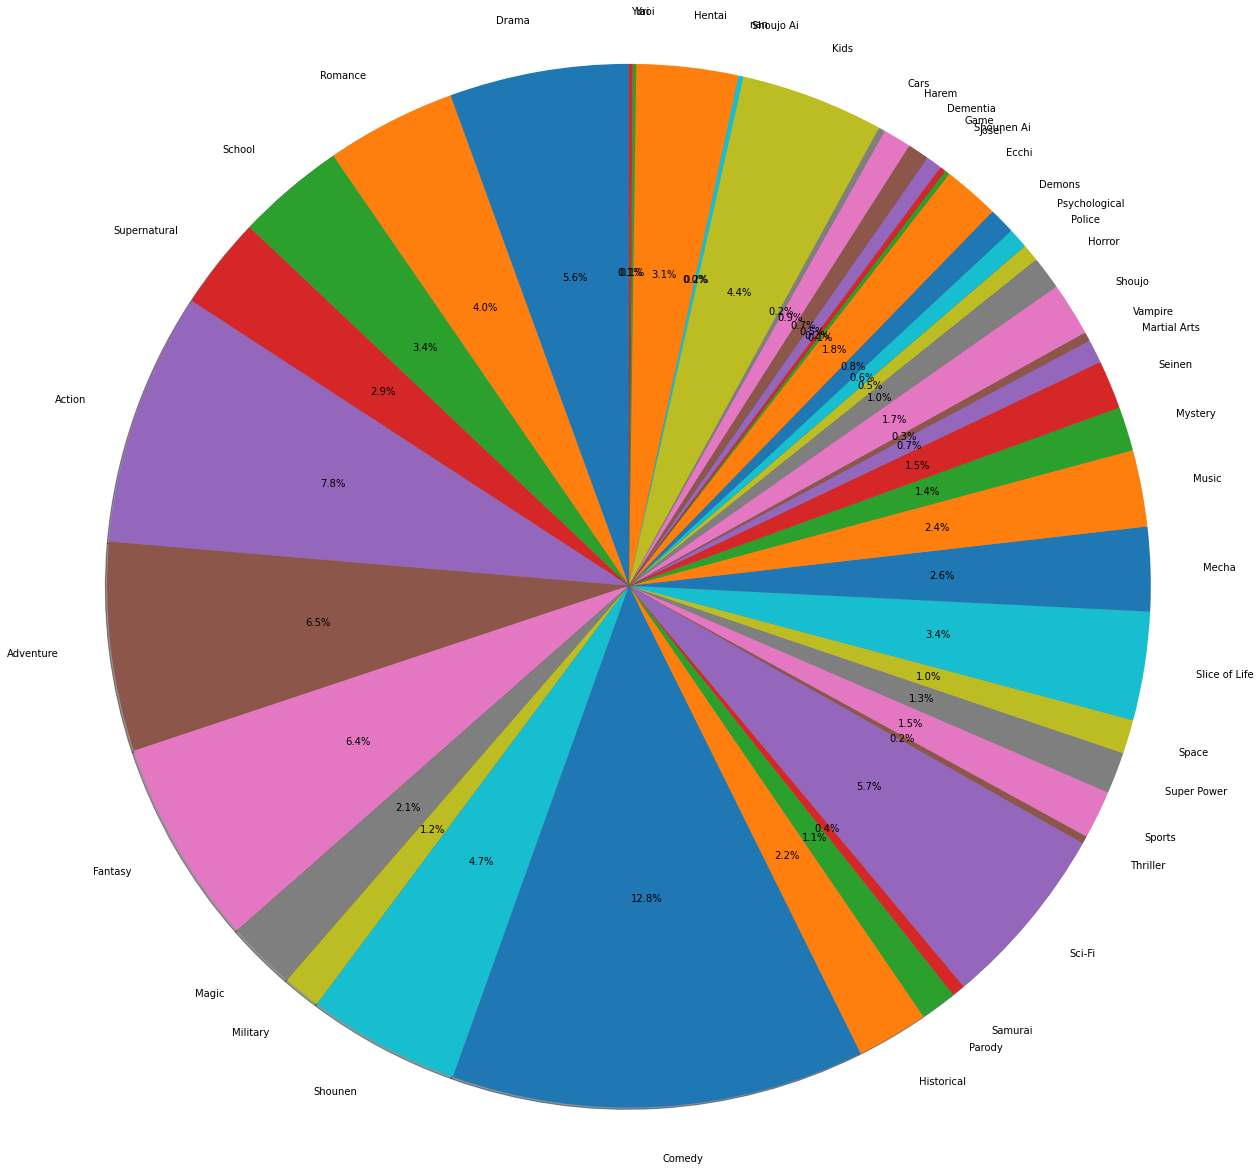

In [7]:
fig1, ax1 = plt.subplots()
ax1.pie(genreValue,labels=keyGenres, autopct='%1.1f%%',shadow=True, startangle=90,radius=6)
plt.show()

Maximum Number of Anime falls under the category of <b>Comedy</b>, followed by <b>Action</b>

<b>Comedy , Shounen , Fantasy, Adventure , Action , SciFi</b> and <b>Drama</b> Alone contribute 45% of the entire Dataset

## Top Anime List - Weighted Averages

In [8]:
#top 20 animes of all time
df2['weighted_rating'] = (df2['rating'] * df2['members']) / df2['members'].sum()
df2.sort_values(by='weighted_rating',ascending=False)[:20] #weighted average

,anime_id,name,genre,type,episodes,rating,members,weighted_rating
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917,0.039750
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229,0.034450
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,0.033080
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100,0.031476
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151,0.028423
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,0.027802
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796,0.027107
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817,0.024107
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297,0.024020
445,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190,0.023872


## Deathnote Winner , Attack On Titan Runner
<br>
<img src="https://wallpapercave.com/wp/er4khNt.jpg" width="400px" height="150px" /><img src="https://images-na.ssl-images-amazon.com/images/I/81QRjjNX1RL.jpg" height="150px" width="400px" />


## Conclusion

On analysing the data, It is Understood that The Given Unique User ID and Anime ID can be used to create a An User-Item Neural Network Collaborative Filtering Recommender System with unique vectors for each unique User as well as Anime whose values, the neural network will learn over time